# ImmoEliza - Data Modelling

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [2]:
df = pd.read_csv('../data/saved_data_myt.csv', index_col=0)

In [3]:
df

,Type of property,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig,Terrace2,Province,Region
0,house,essen,2910,10666428,469000,Heidestatiestraat 26,3,D,390.0,0,...,0,0,2,Installed,0,469000,€469000,1,Antwerpen,Flanders
1,house,bierges,1301,10666426,1395000,"Rue de Wavre, 27",5,C,178.0,0,...,3,1,4,Hyper equipped,Fuel oil,1395000,€1395000,1,Brabant wallon,Wallonia
2,apartment,arlon,6700,10666424,285000,Avenue de Longwy 340,2,D,299.0,0,...,0,0,2,Installed,Electric,285000,€285000,0,Luxembourg,Wallonia
3,house,arlon,6700,10666423,285000,Avenue de Longwy 340,2,D,299.0,0,...,0,0,2,Installed,Electric,285000,€285000,0,Luxembourg,Wallonia
4,apartment,antwerp,2000,10666422,425000,"Grote steenweg, 511",2,C,254.0,0,...,0,0,0,Installed,0,425000,€425000,1,Antwerpen,Flanders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,house,tremelo,3120,10642957,499000,Schrieksebaan 53B001,3,D,383.0,0,...,0,1,2,Installed,0,499000,€499000,1,Vlaams-Brabant,Flanders
8590,villa,schilde,2970,10642946,1199000,Donksesteenweg 212,6,B,199.0,0,...,0,0,3,Installed,Gas,1199000,€1199000,1,Antwerpen,Flanders
8591,duplex,bierbeek%20korbeek-lo,3360,10531808,450000,Herbert Hooverplein 14,3,B,120.0,0,...,0,0,0,Hyper equipped,Gas,450000,€450000,1,Vlaams-Brabant,Flanders
8593,house,wevelgem,8560,10642937,340000,Markeplaats 9,4,B,161.0,0,...,0,0,0,0,0,340000,€340000,1,West-Vlaanderen,Flanders


In [4]:
df.shape

(6623, 29)

### Select properties by (sub)type

In [ ]:
df = df[df.]

### pastebin:

'Bedrooms',
 'Furnished',
 'Terrace',
 'Terrace surface',
 'Surface of the plot',
 'Living room surface',
 'Number of frontages',
 'Construction year',
 'Outdoor parking space',
 'Bathrooms',
 'Shower rooms',
 'Office',
 'Toilets'


 df.drop(columns=['Price', 'Address',
 'Energy class',
 'Primary energy consumption',
 'Building condition',
 'Kitchen type',
 'Heating type',
 'Price_orig',
 'Province',
 'Region']).to_numpy()

### Define model variables

In [43]:
#X = np.array(df['Bedrooms'])
#int_columns=['Bedrooms', 'Furnished', 'Terrace', 'Terrace surface', 'Surface of the plot', 'Living room surface', 'Number of frontages', 'Construction year', 'Outdoor parking space', 'Bathrooms', 'Shower rooms', 'Office', 'Toilets']
#int_columns=['Bedrooms', 'Terrace', 'Terrace surface', 'Surface of the plot', 'Living room surface', 'Number of frontages', 'Construction year', 'Outdoor parking space', 'Bathrooms', 'Shower rooms', 'Office', 'Toilets', 'Primary energy consumption']
int_columns=["Bedrooms", "Bathrooms", "Toilets"]
X = df[int_columns].to_numpy()
#x_1 = df.drop(columns=["x_2","y"]).to_numpy()
#x_2 = df.drop(columns=["x_1","y"]).to_numpy()
y = df.Price.to_numpy().reshape(-1,1)
print(type(X))
print(X)


<class 'numpy.ndarray'>
[[3 1 2]
 [5 2 4]
 [2 2 2]
 ...
 [3 2 0]
 [4 0 0]
 [2 2 4]]


In [44]:
cropped_df = df[int_columns]
cropped_df["Price"] = df["Price"]
#display(cropped_df)
#sns.pairplot(data=df, y_vars = "Price", x_vars = int_columns, height=5)
#sns.pairplot(data=cropped_df)

C:\Users\freva\AppData\Local\Temp\ipykernel_11772\3374535534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cropped_df["Price"] = df["Price"]


<function matplotlib.pyplot.show(close=None, block=None)>

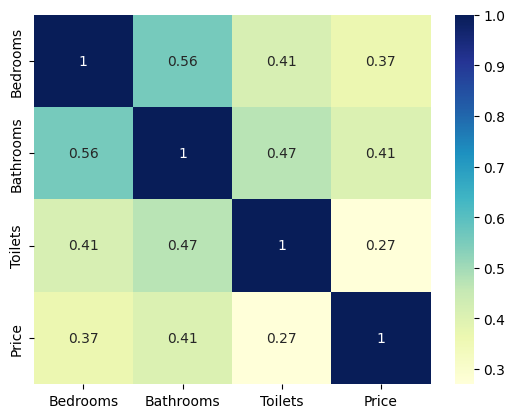

In [45]:
sns.heatmap(cropped_df.corr(), cmap="YlGnBu", annot=True)
plt.show

### Split the dataset

You now know the process!

**Exercise :** Import `train_test_split` from `sklearn` and split the dataset and create the variables `X_train`, `X_test`, `y_train`, `y_test`.

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=41)

In [47]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (4967, 3)
Shape of X_test:  (1656, 3)
Shape of y_train:  (4967, 1)
Shape of y_test:  (1656, 1)


##  Load and fit the model (with Sklearn)

In [48]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [49]:
from sklearn.linear_model import LinearRegression

LR_model = "Linear Regression"

LR_regressor = LinearRegression()
"""X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)"""
LR_regressor.fit(X_train, y_train)
LR_train_score = LR_regressor.score(X_train, y_train)
LR_test_score = LR_regressor.score(X_test,y_test)
LR_y_pred = LR_regressor.predict(X_test)
LR_R_MSE = mean_squared_error(y_test, LR_y_pred, squared = False)

In [50]:
from sklearn.tree import DecisionTreeRegressor

DT_model = "Decision Tree"

DT_regressor = DecisionTreeRegressor(max_depth=6, min_weight_fraction_leaf=0.01)

DT_regressor.fit(X_train, y_train)
DT_train_score = DT_regressor.score(X_train, y_train)
DT_test_score = DT_regressor.score(X_test,y_test)
DT_y_pred = DT_regressor.predict(X_test)
DT_R_MSE = mean_squared_error(y_test, DT_y_pred, squared = False)

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

GS_model = "Decision Tree with GridSearch"

params = {"max_depth" : [2, 4, 6, 8, 10, 12], "min_weight_fraction_leaf" : [0.002, 0.003, 0.0035, 0.004, 0.0045, 0.005, 0.006, 0.01]}
grid_search = GridSearchCV(DT_regressor, params, cv = 10)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
print(best_params)
GS_regressor = DecisionTreeRegressor(max_depth=best_params["max_depth"], min_weight_fraction_leaf=best_params["min_weight_fraction_leaf"])
GS_regressor.fit(X_train, y_train)
GS_train_score = DT_regressor.score(X_train, y_train)
GS_test_score = DT_regressor.score(X_test,y_test)
GS_y_pred = DT_regressor.predict(X_test)
GS_R_MSE = mean_squared_error(y_test, DT_y_pred, squared = False)

{'max_depth': 10, 'min_weight_fraction_leaf': 0.01}


In [52]:
import xgboost as xg

XG_model = "XG Boost"

XG_regressor = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 20)
"""X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)"""
XG_regressor.fit(X_train, y_train)
XG_regressor.fit(X_train, y_train)
XG_train_score = XG_regressor.score(X_train, y_train)
XG_test_score = XG_regressor.score(X_test,y_test)
XG_y_pred = XG_regressor.predict(X_test)
XG_R_MSE = mean_squared_error(y_test, XG_y_pred, squared = False)

[15:45:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[15:45:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


### Scores

"Create a dataframe with an overview of the test scores of all the models"

model_list = ["LR", "DT", "GS", "XG"]
model_score_list = ["model", "train_score", "test_score", "R_MSE"]
data = []
for model in model_list:
    #print(model)
    modelscores = []
    for score in model_score_list:
        item = model + "_" + score
        modelscores.append(item)
    #print(modelscores)
    #modelscores = list(re.replace(r"/['"]+/g", '', str(modelscores)))
    #print(print(modelscores))
    data.append(modelscores)

print(data)
score_df = pd.DataFrame(data, columns=model_score_list)
score_df


In [58]:
model_score_list = ["model", "train_score", "test_score", "R_MSE"]
#display(score_df)
#score_df["train_score_old"] = score_df["train_score"]
#score_df["test_score_old"] = score_df["test_score"]
#score_df["R_MSE_old"] = score_df["R_MSE"]

data = [[LR_model, LR_train_score, LR_test_score, LR_R_MSE], [DT_model, DT_train_score, DT_test_score, DT_R_MSE], [GS_model, GS_train_score, GS_test_score, GS_R_MSE], [XG_model, XG_train_score, XG_test_score, XG_R_MSE]]
newscore_df = pd.DataFrame(data, columns=model_score_list)
#score_df = score_df.join(newscore_df, on=['model'], how='right')
#score_df ["train_score", "test_score", "R_MSE"] = newscore_df ["train_score", "test_score", "R_MSE"]
score_df=newscore_df
display(score_df)

,model,train_score,test_score,R_MSE
0,Linear Regression,0.200220,0.182008,386603.569349
1,Decision Tree,0.319529,0.408661,328707.644303
2,Decision Tree with GridSearch,0.319529,0.408661,328707.644303
3,XG Boost,0.437235,0.399873,331141.111956
